# Predator-Prey Systems Using the Adapted Lotka-Volterra Model

This programme attempts to predict and plot the possible trajectories of a system with a prey population, $x(t)$ and predator population, $y(t)$, in the case of no perturbation (where no external forces are subject to the system) and in the case of perturbation (specifically, the external force being the harvesting of the predator by human interference). 

This programme is part of the project's aim of investigating the effects of human harvesting in contributing to the extinction of the Western Black Rhinoceros in sub-Saharan Africa.
### The Lotka-Volterra Model
The usual Lotka-Volterra Model is as such:
$$
\begin{align} \\
\begin{cases}
\frac{dx}{dt} &= ax - bxy \\
\frac{dy}{dt} &= cxy - dy 
\end{cases}
\end{align} \\
$$
with some positive coefficients $a$, $b$, $c$ and $d$, detailing the growth rate of prey, predation rate of prey, rate of conversion of prey to predator in each encounter, and the death rate of predators. The system is fairly straightforward and easy to understand - and hence is very limited in analysis. 

We note that the system is also fairly unrealistic when applied to real life case studies. One disadvantage of the model is that the prey population (under certain conditions) can grow toward infinity - which in practice is virtually impossible. 

### The Adapted Lotka-Volterra Model (Unperturbed)
For the purposes of this project, we modify the Lotka-Volterra Model to account for a limit - or carrying capacity - of the prey population. We also adjust the value of $c$ to be related to the predation rate of prey $b$. We first study the unperturbed model:
$$
\begin{align} \\
\begin{cases}
\frac{dx}{dt} &= rx\left(1 - \frac{x}{K}\right) - \beta xy &=\mathrel{\mathop:} f(x,y) \\
\frac{dy}{dt} &= k\beta xy - dy &=\mathrel{\mathop:} g_{u}(x,y)
\end{cases}
\end{align} \\
$$
where <br>
$r$ is the growth rate of the prey, <br>
$K$ is the carrying capacity of the prey population, <br>
$\beta$ is the per-capita rate of predation of the predator, <br>
$k$ is the (constant) conversion rate of prey into new predators, and <br>
$d$ is the natural death rate of the predator, <br>
all of which are non-negative. <br>

We note that in this programme, for ease of typing, we replace $\beta$ with `b`. This partly solves the issue of realism on the part of the prey, and makes for more interesting analysis. This model also accounts for the similarity between the rates of change for prey and predator during a prey-predator encounter.

### The Adapted Lotka-Volterra Model (Perturbed)
In order to account for perturbation (that is, harvesting of predators by humans) of the model, we add an additional term into the predator differential equation. The perturbed model is as such:
$$
\begin{align} \\
\begin{cases}
\frac{dx}{dt} &= rx\left(1 - \frac{x}{K}\right) - \beta xy &=\mathrel{\mathop:} f(x,y) \\ 
\frac{dy}{dt} &= k\beta xy - dy - \frac{qy}{1+\omega y} &=\mathrel{\mathop:} g_{p}(x,y)
\end{cases}
\end{align} \\
$$
where <br>
$\omega$ is a suitable constant, <br>
$q$ is the rate of harvesting, <br>
along with the same coefficient definitions is the unperturbed system, all of which are non-negative. <br>

We again note that in this programme, for ease of typing, we replace $\omega$ with `w`. The coefficient was chosen as such to model two specific behaviours in predator harvesting: <br>
(1) As the predator population decreased, the overall harvesting coefficient would decrease, tending to zero, and <br>
(2) As the predator population increased, given the manpower of the human harvesting process, the overall harvesting coefficient would tend towards a fixed value (in this case $\frac{q}{\omega}$). <br>

### Application to the Extinction of the Western Black Rhinoceros
The Western Black Rhinoceros was a subspecies of the Black Rhinoceros, found in Sub-Saharan Africa (namely in Cameroon, Chad, Niger and Nigeria). It was a herbivorous species, of which its diet consisted of leafy plants and shoots. 

The Western Black Rhinoceros was declared extinct by the International Union for Conservation of Nature (IUCN). Many attribute its extinction due to habitat loss and the increased illegal wildlife trade in Sub-Saharan Africa in the 20th century. It was deemed critically endangered in 1996, and while conservation efforts were present, they were insufficient in preventing the eventual extinction of the animal.

We note that our system can be used to model the system between the Western Black Rhinoceros and vegetation, its prey. We first state the assumptions made to our model: <br>
(1) This model assumes that there exists no other predators in the same habitat that hunts the prey population, and no other predators that choose to hunt the predator in the system. Put simply, other than human interference with the system, the system is isolated. <br>
(2) The predator is contained within a finite habitat (and thus the value of the carrying capacity of prey, $K$, is finite. <br>
(3) The values of $r$ and $\beta$ are constant. That is to say, for any given prey, their growth rate and predation rate are constant and consistent with the rest of the prey population. <br>
(4) The values of $k$ and $d$ are constant. That is to say, for any given predator, their conversion rate in predation and natural death rate are constant and consistent with the rest of the predator population. <br>
(5) The effects of harvesting, $q$, is constant. <br>
(6) $\omega$ is a constant coefficient. <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import odeint
from scipy.interpolate import make_interp_spline as smoothline

def system(v, t, p):
    x0, y0 = v
    systemx = r*x0*(1-x0/K) - b*x0*y0
    if p == 0:
        systemy = k*b*x0*y0 - d*y0
    elif p == 1:
        systemy = k*b*x0*y0 - d*y0 - q*y0/(1+w*y0)
    
    return np.array([systemx, systemy], float)

### Parameter Defintion
We first define the parameters of the system as well as the initial conditions of the system, `x0` and `y0`. We note that all parameters are positive. If the unperturbed system is chosen, the values of $w$ and $q$ are irrelevant and can be defined however one wishes.

In [2]:
# Define Parameters
r = .8
b = .3
k = .61
d = .5
w = 1

K = 15
q = 0.5

x0 = 15
y0 = 20

### Stability Analysis of System
Next, we analyse the stability of the perturbed and unperturbed systems. The bifurcation diagrams of each system is shown in the analysis to give a better understanding of the system.

#### Stability Analysis in a Two-Dimensional System
Before we conduct the stability analysis of the system, we discuss the types of equilibrium points and possible bifurcations in a two-dimensional system: <br>

$$
\begin{align}
\begin{cases}
    \frac{dx}{dt} &= f\left(x, y\right) \\
    \frac{dy}{dt} &= g\left(x, y\right)
\end{cases}
\end{align}
$$

As with the one-dimensional system, we analyse the differential equations $\frac{dx}{dt}$ and $\frac{dy}{dt}$ when they equal zero, and find the solutions to the system. We end up with a number of equilibrium points, labelled as $E_{n} = \left( x_{n}^*, y_{n}^*\right)$, for $n \in \mathcal{I}$. We then analyse the Jacobian of the system at each equilibrium point: <br>

$$
\begin{align} \\
J = 
\begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y} \\
\end{bmatrix}
\end{align}
$$

To determine the stability of the equilibrium points, we look at the eigenvalues of the Jacobian $J$, $\lambda_{1}$ and $\lambda_{2}$. There are three types of stable points in the two-dimensional system: <br>
**Node**: $\lambda_1, \lambda_2 \in \mathbb{R}$, $\lambda_1 \cdot \lambda_2 > 0$: <br>
    Stable Node where $\lambda_1, \lambda_2 < 0$, <br>
    Unstable Node where $\lambda_1, \lambda_2 >0$. <br>
**Saddle**: $\lambda_1, \lambda_2 \in \mathbb{R}$, $\lambda_1 \cdot \lambda_2 < 0$ <br>
**Focus**: $\lambda_1, \lambda_2 \in \mathbb{C}$: <br>
    Stable Focus where $\text{Re}\left(\lambda_1\right), \text{Re}\left(\lambda_2\right) < 0$, <br>
    Unstable Focus where $\text{Re}\left(\lambda_1\right), \text{Re}\left(\lambda_2\right) > 0$. <br>

There are many types of bifurcations in the two-dimensional system - we look at two specific types of bifurcations that are found in the adapted Lotka-Volterra Model. <br>
**Saddle-Node Bifurcation** <br>
This type of bifurcation takes place when there is a creation/destruction of stable points. This takes place when the bifurcation parameter varies to let either $\lambda_1$ or $\lambda_2$ switch its sign. <br>
**Supercritical Hopf Bifurcation** <br>
To discuss this type of bifurcation, we first define a Hopf Bifurcation. A Hopf Bifurcation occurs where an equilibrium point goes from complete stability/instability to having a limit cycle for which its trajectories either tend to or move away from. In the case of the supercritical Hopf Bifurcation, the equilibrium starts stable. But as the bifurcation parameter approaches the bifurcation point, the trajectories tend closer and closer to a limit cycle. As the bifurcation parameter passes the bifurcation point, a stable limit cycle surrounds the now unstable equilibrium point. That is to say, all trajectories starting within the limit cycle tends toward it, and any trajectory outside the limit cycle also tends to it.

#### Stability Analysis of the Unperturbed System
In the unperturbed system, there are at most three equilibria which vary in stability due to $K$. The equilibrium points $E_0 = (0,0)$, $E_1 = (0, K)$ are always present, and only when $k\beta K - d = 0$, a third equilibrium point $E_2 = \left( \frac{d}{k\beta}, \frac{r}{\beta} \left( 1 - \frac{d}{k \beta K} \right) \right)$ exists. 

We use the Jacobian of the unperturbed system to analyse the nature of the equilibrium points: <br>
$$
\begin{align} \\
J_{u} = 
\begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g_{u}}{\partial x} & \frac{\partial g_{u}}{\partial y} \\
\end{bmatrix}
= 
\begin{bmatrix}
r\left(1-\frac{2x}{K}\right) - \beta y & -\beta x \\
k\beta y & k \beta x - d\\
\end{bmatrix}
\end{align}
$$

Here we make use of $K$ as the bifurcation parameter, holding all other parameters as control parameters. Linking to our context, we see that the only realistic parameter we are able to vary is the size of the habitat, namely $K$. 

We note that there exists a saddle-node bifurcation at $K = \frac{d}{k\beta}$ which can be summarised in a bifurcation diagram. Given the specified value of $K$, the code below (that produces the bifurcation diagram) also shows the values of equilibrium points $x^{*}$.

In [3]:
# We first define all equations to be plotted
def equilibrium0(K):
    x = 0
    return x

def equilibrium1(K):
    x = K
    return x

def equilibrium2(K, v):
    x = v
    return x

# We then define the function for creating the bifurcation diagram
def unperturbedbifurcation(K, d, k, b, r):
    """
    Creates the Bifurcation Diagram for the modified Lotka-Volterra Model for the unperturbed predator-prey system.
    The function graphs the bifurcation diagram from K = 0 to K = 2*d/(k*b) or K = (3/2)Ki, whichever is larger.
    """
    
    # Generate K values
    v = d/(k*b)
    n = max(2*v, 3*K/2)
    m = 10 # Number of dots to be plotted
    K1val = np.linspace(0, n, 1000)
    K2val = np.linspace(v, n, 500)
    K0sadval = np.linspace(0, n, m)
    a = int(m*v/n)
    K1dotval = np.linspace(0, a*n/(m-1), a + 1)
    K2dotval = np.linspace((a+1)*n/(m-1), n, m - a - 1)
    
    # Complete x* values for each function
    e0val = np.zeros(1000)
    e1val = equilibrium1(K1val)
    e2val = np.ones(500)*v
    e0sadval = np.zeros(m)
    e1dotval = equilibrium1(K1dotval)
    e1sadval = equilibrium1(K2dotval)
    e2dotval = np.ones(m - a - 1)*v

    plt1, ax1 = plt.subplots()
    
    # Plot lines
    ax1.plot(K1val, e0val, label='E_0', color='black')
    ax1.plot(K1val, e1val, label='E_1', color='blue')
    ax1.plot(K2val, e2val, label='E_2', color='green')
    
    # Plot points
    ax1.scatter(K0sadval, e0sadval, label='Saddle Point', color='black', marker='x')
    ax1.scatter(K1dotval, e1dotval, label='Stable Point', color='blue', marker='o')
    ax1.scatter(K2dotval, e1sadval, label='Saddle Point', color='blue', marker='x')
    ax1.scatter(K2dotval, e2dotval, label='Stable Point', color='green', marker='o')
    
    # Plot K line
    ax1.plot(np.ones(1000)*K, K1val, label='System Line', color='red')
    
    # Add labels and legend
    ax1.set_xlabel('K')
    ax1.set_ylabel('x*')
    ax1.set_title('Bifurcation Diagram of the Unperturbed Adapted Lotka-Volterra Predator-Prey Model')
    ax1.legend()

#### Stability Analysis of the Perturbed System
The perturbed system is obviously more complicated - now we involve two varying quantities - namely $K$ and $q$. The system has at most four equilibrium points. The first two are $E_0 = (0,0)$, $E_1 = (0, K)$ as aforementioned. 

The other two equilibrium points can be seen by reducing the system to
$$
\begin{cases} 
r\left(1 - \frac{x}{K}\right) - \beta y = 0 \\
k\beta x - d - \frac{q}{1+\omega y} = 0
\end{cases}\
$$
<br>
We end up with some quadratic with determinant $\Delta = M^{2} - 4k\beta^{2}K\omega rN$, where $M = k\beta^{2}K + d\omega r - k\beta K\omega r$ and $N = d + q - k\beta K$. Thus, when $\Delta \ge 0$ (or $N \ge \frac{M^{2}}{4k\beta^{2}K\omega r}$), we get root(s):
$$
x^{*} = \frac{k\beta K\omega r + k\beta^{2}K + d\omega r \pm \sqrt{\Delta}}{2k\beta K\omega r}
$$

with corresponding $y^{*} = \frac{r(K-x^{*})}{K\beta}$. We additionally need to consider if $x^{*} \le K$ to be considered relevant equilibrium points (since $K$ is the carrying capacity, we cannot have an equilibrium point above $x = K$). If the point(s) satisfy the aforementioned conditons, we denote these point(s) $E_2$ and $E_3$ accordingly. 

Here we choose $K$ and $q$ to be our bifurcation parameters, holding all other parameters as control parameters. As we link it to our context, we note that the size of the habitat that the predators and prey exist in, as well as the harvesting rate of the predator are the two quantities we are interested in. 

We analyse the Jacobian of the perturbed system at various equilibrium points: 
<br>
$$
\begin{align} \\
J_{p} = 
\begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g_{p}}{\partial x} & \frac{\partial g_{p}}{\partial y} \\
\end{bmatrix}
= 
\begin{bmatrix}
r\left(1-\frac{2x}{K}\right) - \beta y & -\beta x \\
k\beta y & k \beta x - d - \frac{q}{\left(1 + \omega y\right)^{2}}\\
\end{bmatrix}
\end{align}
$$

We note that there are five regions on the $K$-$q$ plane, dictated by the following equations and values of $K$:
$$
\begin{align} \\
&\begin{cases}
q_{K}(K) \mathrel{\mathop:}= k\beta K - d \\
q_{\Delta}(K) \mathrel{\mathop:}= \frac{(k\beta K\omega r + k\beta^{2}K - d\omega r)^{2}}{4k\beta^{2}K\omega r} \\
q_{h_{1}}(K) \mathrel{\mathop:}= \frac{-B + \sqrt{B^{2}-4AC}}{2A}\\
q_{h_{2}}(K) \mathrel{\mathop:}= \frac{-B - \sqrt{B^{2}-4AC}}{2A}
\end{cases} 
\\
&\begin{cases}
K_{0} = \frac{d}{k\beta} \\ 
\bar{K} = \frac{d\omega r}{k\beta\left(\omega r - \beta\right)} \\
\tilde{K} = \frac{\beta+\omega r + \omega d + 2\sqrt{\beta\omega d}}{k\beta\omega} \\
K_{1} = \text{value of $K$ where } q_{h_{1}}(K) \text{ or } q_{h_{2}}(K) \text{ intersects } q_{K}(K)
\end{cases}
\end{align}
$$ <br>
where $A$, $B$ and $C$ form the coefficients of the quadratic equation $Aq^{2} + Bq + C = 0$ derived from letting the trace of the Jacobian equal 0. These values are specifically 

$$
\begin{cases}
A \mathrel{\mathop:}= -\beta\omega\left(k\beta K - r\right)^{2} \\
B \mathrel{\mathop:}= k^{3}\beta^{4}\omega K^{3} - \left(k^{2}\beta^{4} + k^{2}\beta^{3}d\omega + k^{2}\beta^{3}\omega r\right)K^{2} + \left(4k\beta^{2}d\omega r + d\omega^{2}r^{2}k\beta\right)K - d^{2}\omega^{2}r^{2} - r^{2}\beta d\omega - r^{3}d\omega^{2} \\
C \mathrel{\mathop:}= -d\left(k\beta K\omega r - d\omega r + k\beta^{2}K\right)^{2}
\end{cases}
$$
<br>
We can confirm the existence of $K_{1}$, since <br>
(1) $q_{\Delta}(K)$ and $q_{h_{2}}(K)$ must intersect <br>
(2) $q_{h_{1}}(K)$ and $q_{h_{2}}(K)$ intersect at $K = \tilde{K}$ <br>
(3) $q_{h_{1}}(K) \rightarrow 0$ as $K \rightarrow \infty$ <br>
However, the computation of $K_{1}$ is complicated beyond the scope of this project. We will only confirm its existence but not calculate its precise value, instead computing a numerical approximation of $K_{1}$ (see function `K_1`).

The five regions are defined as:
$$
\begin{align}
R_{1} &\mathrel{\mathop:}= \left\{ \left(K,q\right) \mid \left(K_{0} < K < \tilde{K}, 0 < q < q_{K}(K)\right)\bigcup\left(\tilde{K} < K < K_{1}, q_{h_{1}}(K) < q < q_{K} (K)\right)\bigcup\left(K > \tilde{K}, 0 < q < q_{h_{1}}(K)\right)\right\} \\
R_{2} &\mathrel{\mathop:}= \left\{ \left(K,q\right) \mid \left(\tilde{K} < K < K_{1}, q_{h_{1}}(K) < q < q_{h_{2}(K)}\right) \bigcup \left(K > \tilde{K}, q_{h_{1}}(K) < q < q_{K}(K) \right) \right\}\\
R_{3} &\mathrel{\mathop:}= \left\{ \left(K,q\right) \mid K > K_{1}, q_{K}(K) < q < q_{h_{2}}(K) \right\}\\
R_{4} &\mathrel{\mathop:}= \left\{ \left(K,q\right) \mid \left(\bar{K} < K < K_{1}, q_{K}(K) < q < q_{\Delta}(K)\right)\bigcup \left(K > K_{1}, q_{h_{2}}(K) < q < q_{\Delta}(K)\right)\right\}\\
R_{5} &\mathrel{\mathop:}= \left\{ \left(K,q\right) \mid \left(0 < K < K_{0}, q > 0\right) \bigcup \left(K_{0} < K < \bar{K}, q < q_{K}(K)\right)\bigcup\left(K > \bar{K}, q > q_{\Delta}(K)\right)\right\}
\end{align}
$$

The existence and local stability of each equilibrium point for each region can be found in the table below.

|  | $R_{1}$ | $R_{2}$ | $R_{3}$ | $R_{4}$ | $R_{5}$ |
|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
| $E_{0}$ | Saddle Point | Saddle Point | Saddle Point | Saddle Point | Saddle Point |
| $E_{1}$ | Saddle Point | Saddle Point | Stable Node | Stable Node | Stable Node |
| $E_{2}$ | Stable Focus | Unstable Focus | Unstable Focus | Stable Focus | - |
| $E_{3}$ | - | - | Saddle Point | Saddle Point | - |

We note that there exists two bifurcation points within the system. Firstly, we note the Saddle-Node Bifurcation along the line $q = q_{\Delta}(K)$, where equilibrium points are created/destroyed along that line, between $R_1$ and $R_4$, and $R_5$. Next, we note that there is a bifurcation (a supercritical Hopf Bifurcation) of $E_2$ as it changes stabilities.  This takes place along either $q = q_{H_{1}}(K)$ or $q = q_{H_{2}}(K)$.

There are two cells of code below. The first attempts to numerically compute the value of $K_1$. The second produces the bifurcation diagram, while plotting a point that designates the values of the parameters $K$ and $q$ defined previously. We note that the bifurcation diagram is different from the one seen in the unperturbed system. The bifurcations of the system involve two variables $K$ and $q$, and thus require two axes to be accurately represented. We thus plot the point of the system and categorise its region later on, detailing exactly how many equilibrium points and what they are later on in the programme.

For the purposes of the application to the Western Black Rhinoceros, we note that the value of $K$ here should decrease from that of the unperturbed system due to the effects of habitat loss (and thus a reduced carrying capacity of prey). The value of $K$ will not be altered here.

In [4]:
# Define the functions
def q_K(K):
    return k * b * K - d

def q_d(K):
    return ((k * b * K * w * r + k * b * b * K - d * w * r) ** 2) / (4 * k * b * b * w * r * K)

def A(K):
    return -b * w * ((k * b * K - r) ** 2)

def B(K):
    return (k ** 3) * (b ** 4) * w * (K ** 3) - ((k ** 2) * (b ** 4) + (k ** 2) * (b ** 3) * d * w + (k ** 2) * (b ** 3) * w * r) * (K ** 2) + (4 * k * (b ** 2) * d * w * r + d * (w ** 2) * (r ** 2) * k * b) * K - (d * w * r) ** 2 - (r ** 2) * b * d * w - (r ** 3) * d * (w ** 2)

def C(K):
    return -d * ((k * b * K * w * r - d * w * r + k * (b ** 2) * K) ** 2)

def q_h1(K):
    return (-B(K) + np.sqrt(B(K) ** 2 - 4 * A(K) * C(K))) / (2 * A(K))

def q_h2(K):
    return (-B(K) - np.sqrt(B(K) ** 2 - 4  * A(K) * C(K))) / (2 * A(K))

def eq1(K):
    return q_K(K) - q_h1(K)

def eq2(K):
    return q_K(K) - q_h2(K)


def K_1():
    """
    Numerically solves for the value of K1, as given by q_K = q_h1 or q_K = q_h2, from an initial guess
    """

    # Determine if q_K(K) intersects q_h1(K) or q_h2(K)
    Kt = (b + w*r + w*d + 2*np.sqrt(b*w*d))/(k*b*w)
    val = eq1(Kt)
    
    if val == 0:
        solution = Kt
    elif val > 0: # then q_K(K) intersects q_h2(K)
        solution = root(eq2, Kt).x[0]
    else: # then q_K(K) intersects q_h1(K)
        solution = root(eq1, Kt).x[0]
    return solution
K_1()

12.992755760456838

In [5]:
def perturbedbifurcation(r, K, b, k, d, w, q):
    """
    Creates the Bifurcation Diagram for the modified Lotka-Volterra Model for the perturbed predator-prey system.
    The function graphs the bifurcation diagram from K = 0 to the specified value of K+5.
    """
    # Generate K values
    Kt = (b + w*r + w*d + 2*np.sqrt(b*w*d))/(k*b*w)
    Kmax = max(K+5, Kt+5)
    K_values = np.linspace(0.01, Kmax, 1000)
    Kd_values = np.linspace(Kt, Kmax, 1000)

    # Compute q values for each function
    q_K_values = q_K(K_values)
    q_d_values = q_d(K_values)
    q_h1_values = q_h1(Kd_values)
    q_h2_values = q_h2(Kd_values)

    plt2, ax2 = plt.subplots()
    # Plot the lines
    ax2.plot(K_values, q_K_values, label='q_K', color='green')
    ax2.plot(K_values, q_d_values, label='q_d', color='purple')
    ax2.plot(Kd_values, q_h1_values, label='q_h1', color='blue')
    ax2.plot(Kd_values, q_h2_values, label='q_h2', color='blue')

    # Plot Point In Question
    ax2.scatter(K, q, color = 'red')

    ax2.set_ylim([-1, 0.3*Kmax])
    
    # Add labels and legend
    ax2.set_xlabel('K')
    ax2.set_ylabel('q')
    ax2.set_title('Bifurcation Diagram of the Perturbed Adapted Lotka-Volterra Predator-Prey Model')
    ax2.legend()

#### Stability Analysis: A Summary
We summarise all the information discussed by plotting the bifurcation diagram for system as specified above. The function `stability` first uses function `eqpoints`, which outputs the equilibrium points of the system (perturbed or unperturbed). Next, depending on the value of `p` specified above, it uses either `unperturbedbifurcation` or `perturbedbifurcation` to graph the bifurcation diagram. The codes for `eqpoints` and `stability` are found below, with the plots for the values specified above displayed as well.

In [6]:
def eqpoints(r, K, b, k, d, w, q, p):
    """
    Calculates Equilibrium Points and determines their stability, returning the set of equilibrium points.
    """
    # Define equilibria
    e0 = (0, 0)
    e1 = (K, 0)
    
    # Define return value (equilibrium points)
    eqp = [e0, e1]

    # Determine stability of equilibria
    if p == 0:
        # Unperturbed System
        print('Unperturbed System')
        # Define condition
        a = d / (k * b)

        if K > a:
            # Define extra equilibria
            e2 = (a, (r / b)*(1 - a / K))
            eqp.append(e2)
            print(e0, 'is a saddle point')
            print(e1, 'is a saddle point')
            print(e2, 'is a stable point')
        else:
            print(e0, 'is a saddle point')
            print(e1, 'is a stable point')

    elif p == 1:
        # Perturbed System
        print('Perturbed System')
        # Define conditions
        A = -b*w*((k*b*K - r)**2)
        B = (k**3)*(b**4)*w*(K**3) - ((k**2)*(b**4) + (k**2)*(b**3)*d*w + (k**2)*(b**3)*w*r)*(K**2) + (4*k*(b**2)*d*w*r + d*(w**2)*(r**2)*k*b)*K - (d*w*r)**2 - (r**2)*b*d*w - (r**3)*d*(w**2)
        C = -d*((k*b*K*w*r - d*w*r + k*(b**2)*K)**2)
            # q conditions
        q_K = k*b*K - d
        q_d = (k*b*K*w*r + k*b*b*K - d*w*r)**2/(4*k*b*b*w*r*K)
        q_h1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
        q_h2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)
            # K conditions
        K0 = d/(k*b)
        Kbar = d*w*r/(k*b*(w*r-b))
        Kt = (b + w*r + w*d + 2*np.sqrt(b*w*d))/(k*b*w)
        K1 = K_1()
        # print('K0', K0, 'Kbar', Kbar, 'Kt', Kt, 'K1', K1)
        # print('q_K', q_K,'q_d', q_d, 'q_h1', q_h1, 'q_h2', q_h2)
        
        # Define e2 and e3 (based on delta and thus N and M), and remove any values with x* > K
        delta = (k*b*b*K + d*w*r - k*b*K*w*r)**2 - 4*k*b*b*K*w*r*(d+q-k*b*K)
        e25 = (k*b*K*w*r + k*b*b*K + d*w*r)/(2*k*b*w*r)
        if delta > 0:
            e2x = e25 - np.sqrt(delta)/(2*k*b*w*r)
            if e2x <= K:
                e2 = (e2x, r*(K-e2x)/(K*b))
                eqp.append(e2)
                e3x = e25 + np.sqrt(delta)/(2*k*b*w*r)
                if e3x <= K and e3x != e2x:
                    e3 = (e3x, r*(K-e3x)/(K*b))
                    eqp.append(e3)
        elif delta == 0 and e25 <= K:
            e2 = (e25, r*(K-e25)/(K*b))
            eqp.append(e2)

        # Determine region on K-q diagram (*** NEEDS TO BE CHECKED)
        region = 0
        # Region 1
        if K0 < K and K < Kt and 0 < q and q < q_K:
            region = 1
        elif Kt < K and K < K1 and q_h2 < q and q < q_K:
            region = 1
        elif Kt < K and 0 < q and q < q_h1 and q < q_K:
            region = 1
        # Region 2
        elif Kt < K and K < K1 and q_h1 < q and q < q_K:
            region = 2
        elif K > Kt and q_h1 < q < q_h2:
            region = 2
        # Region 3
        elif K > K1 and q_K< q and q < q_h2:
            region = 3
        # Region 4
        elif Kbar < K and K < K1 and q_K < q and q < q_d:
            region = 4
        elif K > K1 and q_h2 < q and q < q_d:
            region = 4
        # Region 5
        elif K > Kbar and q > q_d:
            region = 5
        elif K0 < K and K < Kbar and q > q_K:
            region = 5
        elif 0 < K and K < K0 and q > 0:
            region = 5
        else:
            print('No Region Found')

        # Depending on region, classify points
        if region == 1:
            print('Region', region)
            print(e0, 'is a saddle point')
            print(e1, 'is a saddle point')
            print(e2, 'is a stable focus')
        elif region == 2:
            print('Region', region)
            print(e0, 'is a saddle point')
            print(e1, 'is a saddle point')
            print(e2, 'is a unstable focus')  
        elif region == 3:
            print('Region', region)
            print(e0, 'is a saddle point')
            print(e1, 'is a stable node')
            print(e2, 'is a unstable focus')
            print(e3, 'is a saddle point')
        elif region == 4:
            print('Region', region)
            print(e0, 'is a saddle point')
            print(e1, 'is a stable node')
            print(e2, 'is a stable focus')
            print(e3, 'is a saddle point')
        elif region == 5:
            print('Region', region)
            print(e0, 'is a saddle point')
            print(e1, 'is a stable node')
        else:
            print('error in calculations')
    else:
        print('Error: value of p is incorrect. p is either 0 or 1')
    return eqp
    

In [7]:
def stability(r, K, b, k, d, w, q, p):
    """
    Determines the stable points and plots the bifurcation diagram of the system.
    """
    
    # Stable Points
    eqp = eqpoints(r, K, b, k, d, w, q, p)
    
    # Bifurcation Diagram
    if p == 0:
        unperturbedbifurcation(K, d, k, b, r)
    elif p == 1:
        perturbedbifurcation(r, K, b, k, d, w, q)
    else:
        print('Error: value of p is incorrect. p is either 0 or 1')

Unperturbed System
(0, 0) is a saddle point
(15, 0) is a saddle point
(2.73224043715847, 2.18093503339405) is a stable point
Perturbed System
Region 1
(0, 0) is a saddle point
(15, 0) is a saddle point
(3.636925202328129, 2.020102186252777) is a stable focus


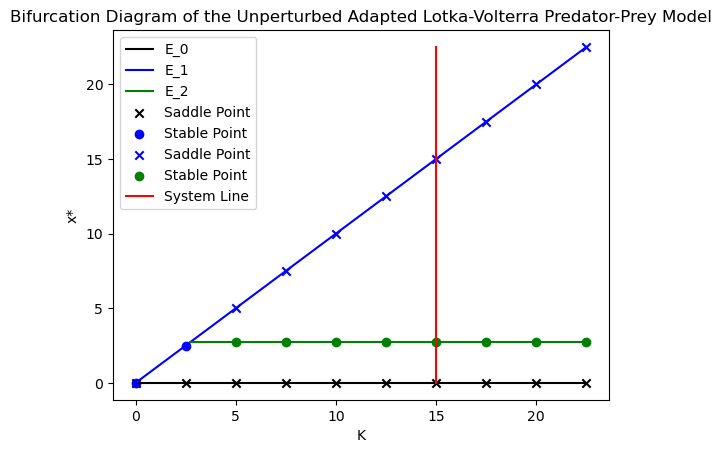

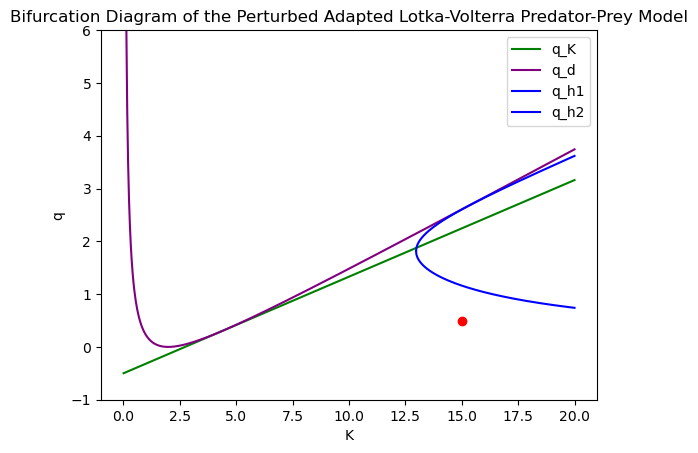

In [8]:
# Unperturbed
p = 0
stability(r, K, b, k, d, w, q, p)

# Unperturbed
p = 1
stability(r, K, b, k, d, w, q, p)

### Construction of the Phase Plane of the Adapted Lotka-Volterra Model
We now graph the Phase Plane Analysis of the Adapted Lotka-Volterra Model. The two cells of code below define the functions for plotting the phase plane of the unperturbed and perturbed systems respectively.

In [9]:
def unperturbed(pval, qval, r, K, b, k, d, eqp, pmin, pmax, qmin, qmax, x0, y0, dt=1/200, time=100):
    """
    Displays the phase portrait of the unperturbed adapted Lotka-Volterra Predator-Prey System. Equilibrium Points are
    determined analytically and inserted into the phase portrait.
    """
    # Calculate rates of change
    dp_dt = r * pval * (1 - pval / K) - b * pval * qval
    dq_dt = k * b * pval * qval - d * qval

    # Create contour plot
    fig3, ax3 = plt.subplots()
    ax3.streamplot(pval, qval, dp_dt, dq_dt, color='darkgreen')

    # Axes Limits
    ax3.set_xlim([pmin - 1, pmax])
    ax3.set_ylim([qmin - 1, qmax/2])

    # Plot equilibrium points
    for x in range(len(eqp)):
        ax3.plot(eqp[x][0], eqp[x][1], 'ro', label='Equilibrium')
    
    # Trajectory of Initial Conditions
    init = [x0, y0]
    ax3.plot(init[0], init[1], 'bo')
    t = np.arange(0, time, dt)
    ttotal = len(t)
    sol = odeint(system, init, t, args=(p, ))
    x = [x0]
    y = [y0]
    for n in range(ttotal):
        x.append(sol[n][0])
        y.append(sol[n][1])
        if np.isclose(sol[n][0], 0, atol = 1e-01) and np.isclose(sol[n][1], 0, atol = 1e-01):
            break
        elif np.isclose(sol[n][0], K, atol = 1e-01) and np.isclose(sol[n][1], 0, atol = 1e-01):
            break
    ax3.plot(x, y, color='blue')
    
    # Add Labels and Title
    ax3.set_xlabel('Prey Population')
    ax3.set_ylabel('Predator Population')
    ax3.set_title('Phase Plane Diagram (Unperturbed)')

In [10]:
def perturbed(pval, qval, r, K, b, k, d, w, q, eqp, pmin, pmax, qmin, qmax, x0, y0, dt=1/200, time=100):
    """
    Displays the phase portrait of the perturbed adapted Lotka-Volterra Predator-Prey System due to 
    harvesting of predator. Equilibrium Points are determined analytically and inserted into the phase portrait.
    """
    # Calculate rates of change
    dp_dt = r * pval * (1 - pval / K) - b * pval * qval
    dq_dt = k * b * pval * qval - d * qval - q * qval / (1 + w * qval)

    # Create contour plot
    fig4, ax4 = plt.subplots()
    ax4.streamplot(pval, qval, dp_dt, dq_dt, color='darkgreen')

    # Axes Limits
    ax4.set_xlim([pmin - 1, pmax])
    ax4.set_ylim([qmin - 1, qmax/2])

    # Plot equilibrium points
    for x in range(len(eqp)):
        ax4.plot(eqp[x][0], eqp[x][1], 'ro', label='Equilibrium')
        
    # Trajectory of Initial Conditions
    init = [x0, y0]
    ax4.plot(init[0], init[1], 'bo')
    t = np.arange(0, time, dt)
    ttotal = len(t)
    sol = odeint(system, init, t, args=(p, ))
    x = [x0]
    y = [y0]
    for n in range(ttotal):
        x.append(sol[n][0])
        y.append(sol[n][1])
        if np.isclose(sol[n][0], 0, atol = 1e-02) and np.isclose(sol[n][1], 0, atol = 1e-02):
            break
        elif np.isclose(sol[n][0], K, atol = 1e-02) and np.isclose(sol[n][1], 0, atol = 1e-02):
            break
    ax4.plot(x, y, color='blue')

    # Add labels and title
    ax4.set_xlabel('Prey Population')
    ax4.set_ylabel('Predator Population')
    ax4.set_title('Phase Plane Diagram (Perturbed)')

### Summary of Analysis
We now combine all aspects of the analysis into one function. This function `phaseplane` details <br>
(1) Which system, perturbed or unperturbed, has been selected,<br>
(2) If perturbed, which region it falls under,<br>
(3) The system's equilibrium points and their stability,<br>
(4) The bifurcation diagram of the system and where the specified values lie on the bifurcation diagram, and <br>
(5) The phase plane diagram of the system and the trajectory of the specified values in the phase plane diagram.

In [11]:
# Plot Phase Plane Analysis
def phaseplane(r, K, b, k, d, w, q, p, x0, y0):
    """
    Combines the functions eqpoints, unperturbed and perturbed to output the desired information.
    """
   
    # Define Prey and Predator Ranges
    pmin, pmax = 0, K+10
    qmin, qmax = 0, K+10
    ite = 200
    p_range = np.linspace(pmin, pmax, ite)
    q_range = np.linspace(qmin, qmax, ite)

    # Create meshgrid of Prey and Predator values
    pval, qval = np.meshgrid(p_range, q_range)
    
    # Examine stable points and plot phase plane
    eqp = eqpoints(r, K, b, k, d, w, q, p)
    if p == 0:
        unperturbedbifurcation(K, d, k, b, r)
        unperturbed(pval, qval, r, K, b, k, d, eqp, pmin, pmax, qmin, qmax, x0, y0)
    elif p == 1:
        perturbedbifurcation(r, K, b, k, d, w, q)
        perturbed(pval, qval, r, K, b, k, d, w, q, eqp, pmin, pmax, qmin, qmax, x0, y0)
    else:
        print('Error: value of p is incorrect. p is either 0 or 1')

Perturbed System
Region 1
(0, 0) is a saddle point
(15, 0) is a saddle point
(3.636925202328129, 2.020102186252777) is a stable focus


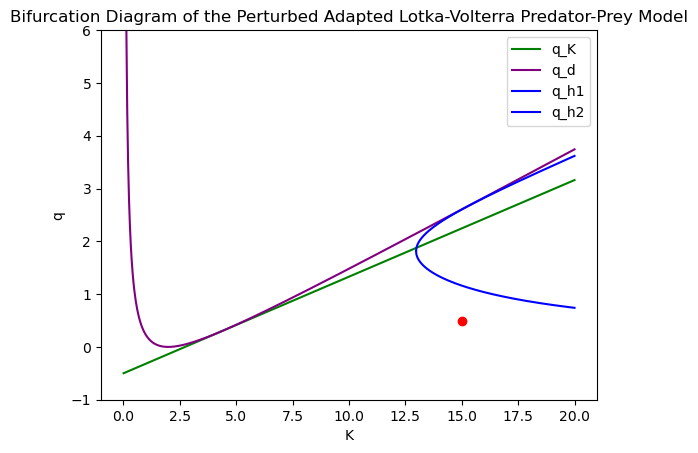

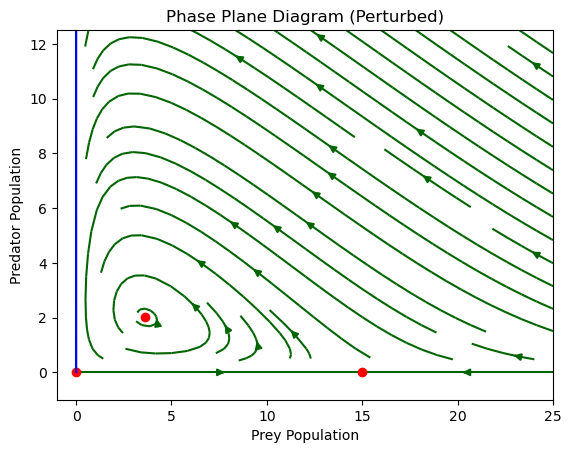

In [12]:
phaseplane(r, K, b, k, d, w, q, p, x0, y0)

### Conclusions Drawn from the Model
We shall implement our system to model the context as mentioned above. Given our assumptions as described above, we see that the system, without human intervention heads to a steady equilbrium point of coexistence between the Western Black Rhinoceros and the vegetation available in its habitat. We define our constants as stated below and plot the bifurcation diagram and phase plane diagram below:

In [13]:
r = .8
b = .3
k = .61
d = .5
w = 1    # IRRELEVANT IN THIS CASE

K = 10
q = 0.5  # IRRELEVANT IN THIS CASE

x0 = 15
y0 = 3

p = 0

Unperturbed System
(0, 0) is a saddle point
(10, 0) is a saddle point
(2.73224043715847, 1.9380692167577416) is a stable point


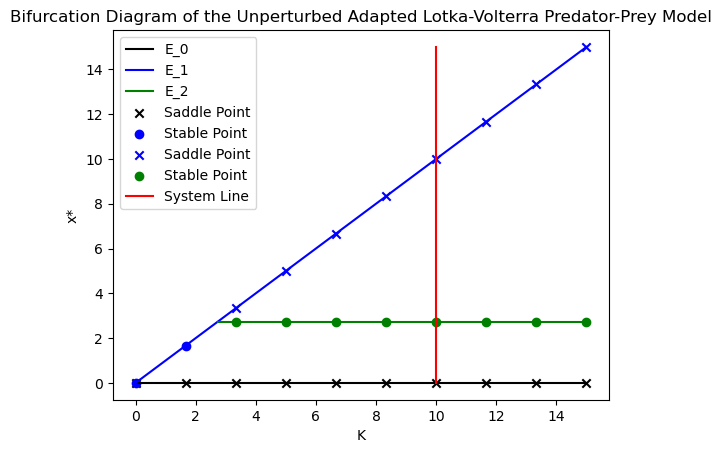

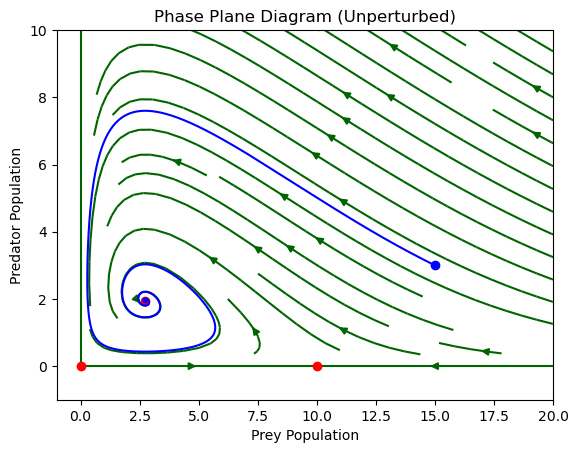

In [14]:
phaseplane(r, K, b, k, d, w, q, p, x0, y0)

We note that the system with no human interference results in an equilibrium where both the predator and prey coexist.

We now consider the system (with the same parameters) the effects of human interference. Given the context, we note that there was a loss of habitation of the Western Black Rhinoceros as well as high values of illegal hunting of the animal. We thus redefine the value of $K$ and define values of $\omega$ and $q$:

In [15]:
w = 1

q = 3

p = 1

Perturbed System
Region 5
(0, 0) is a saddle point
(10, 0) is a stable node


/var/folders/rg/_zg8x1xx52b2b6jb92gd8t600000gn/T/ipykernel_73866/929064374.py:40: RuntimeWarning: invalid value encountered in sqrt
  q_h1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
/var/folders/rg/_zg8x1xx52b2b6jb92gd8t600000gn/T/ipykernel_73866/929064374.py:41: RuntimeWarning: invalid value encountered in sqrt
  q_h2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)


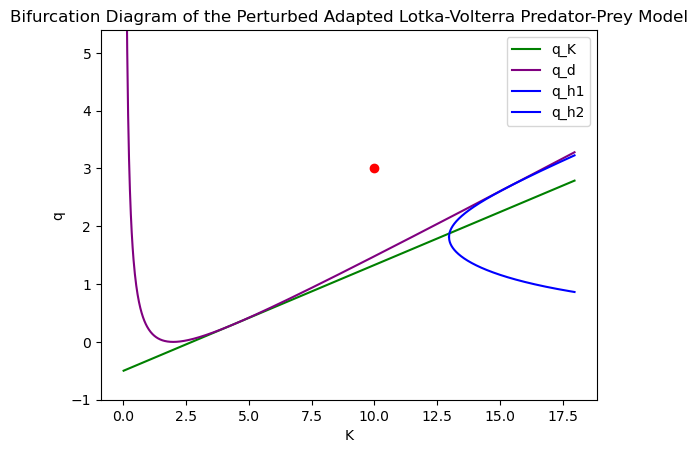

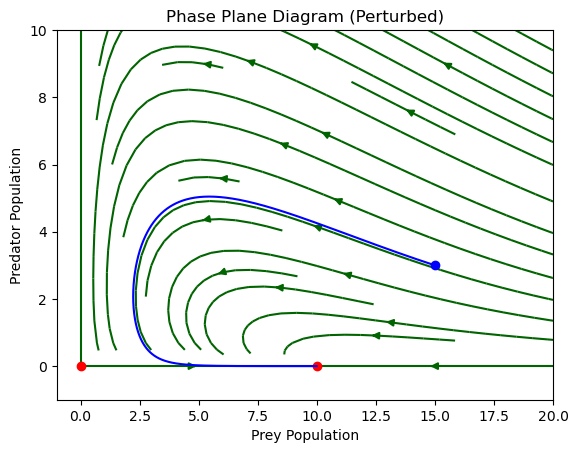

In [16]:
phaseplane(r, K, b, k, d, w, q, p, x0, y0)

We see that the effects of human interference have caused the Western Black Rhinoceros to go extinct. The system heads to the state for which there are no predators (Western Black Rhinoceros) left, and the prey (vegetation), given free reign, stabilises at its carrying capacity. 

One of the main criticisms of the handling of the extinction of the Western Black Rhinoceros was the efforts by international bodies to mitigate the effects of illegal trade. We note that with increased conservation efforts, the overall harvesting rate will decrease, resulting in a smaller value of $q$, which allows the system to return to a steady equilibrium.

In [17]:
q = 0.5

Perturbed System
Region 1
(0, 0) is a saddle point
(10, 0) is a saddle point
(3.757611011852627, 1.6646370635059664) is a stable focus


/var/folders/rg/_zg8x1xx52b2b6jb92gd8t600000gn/T/ipykernel_73866/929064374.py:40: RuntimeWarning: invalid value encountered in sqrt
  q_h1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
/var/folders/rg/_zg8x1xx52b2b6jb92gd8t600000gn/T/ipykernel_73866/929064374.py:41: RuntimeWarning: invalid value encountered in sqrt
  q_h2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)


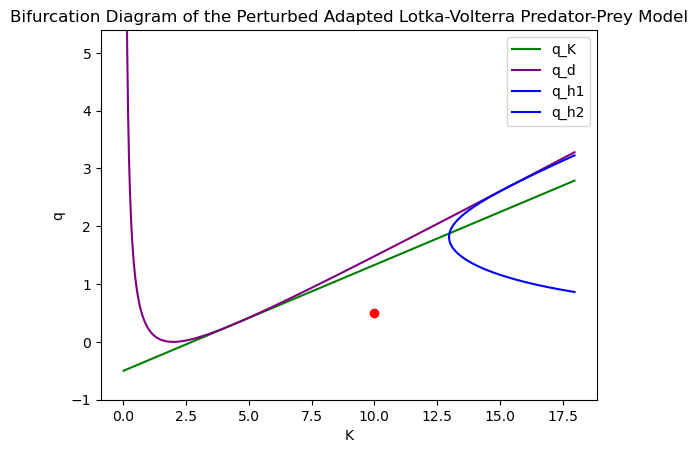

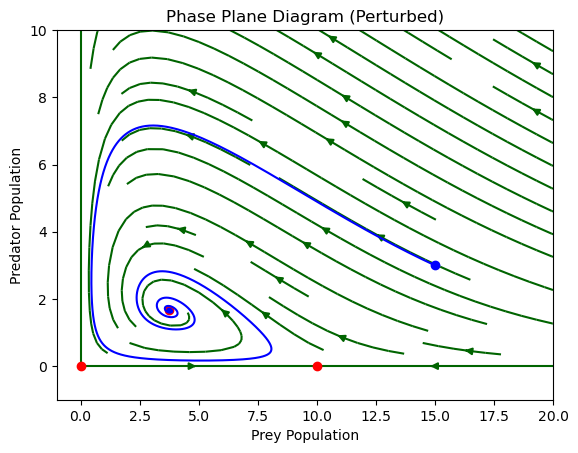

In [18]:
phaseplane(r, K, b, k, d, w, q, p, x0, y0)

### Power and Limitations of the Model
The choice of the adapted Lotka-Volterra Model (over other predator-prey models) was inspired by two main motives: <br>
(1) To realistically model the change in prey population over time. We note that especially with vegetation (the prey in question), the intrinsic growth rate of vegetation cannot lead the vegetation population to tend to $\infty$. As such, the logistic growth model was incorporated into the rate of change of vegetation equation. <br>
(2) To realistically model the harvesting of the Western Black Rhinoceros (the predator in question) over time. A possible term for this modelling could have been a constant term, i.e. $-qy$. However, this was deemed unrealistic. On top of making the analysis of the system too rudimentary for the standard of the project, it does not accurately describe the rate of predator harvesting with larger populations of the predator. It is unrealistic to expect the rate of harvesting to increase linearly with larger populations - the manpower involved in illegal hunting is assumed to be fixed, and the overall rate of hunting must approach a lower than constant value. As such, the term $-\frac{qy}{1+\omega y}$ was used instead. <br>
These two points make for stronger and more realistic analysis of the system over more simplistic models such as the original Lotka-Volterra Model. 

However, we note that the model has limitations as well. These can be seen through the assumptions made in the experiment.<br>
(1) This model assumes that other than human interference with the system, the system is isolated. However, we recognised that this is definitely not the case. Given that the Western Black Rhinoceros were allowed to roam free in the National Parks of Sub-Saharan Africa, there were surely other predators that not only competed with the Western Black Rhinoceros for vegetation, but also were predators themselves to the Western Black Rhinoceros. These would have definitely driven down the available vegetation (and thus value of $K$) while also driving up the harvesting rate (and thus value of $q$, not just by humans but also other predators. <br>
(2) The values of $r$, $\beta$, $k$, $d$ and $q$ are constant. However, realistically, these values are also functions of time themselves. However, these make for very complex analysis, and is beyond the scope of this project. <br>
(3) $\omega$ is a 'suitable' coefficient. However, the application of $\omega$ was not studied extensively in the duration of the project. One possible relationship with the Western Black Rhinoceros-vegetation system could be the conservation efforts to preserve the existence of the Western Black Rhinoceros. This would mean that instead of reducing the value of $q$ to reflect higher conservation efforts, the value of $\omega$ could increase instead. However, this leads to a bifurcation diagram in three dimensions (we require a $K$-$q$-$\omega$ space), which is beyond the scope of this project. <br>
(4) The exact values of each coefficient is extremely difficult to determine. This is a natural limitation of all modelling. The model can only go so far as to predict possible trajectories from an initial position. However, the trajectories depend on the values of the coefficients, which in practice is impossible to determine accurately. We can only estimate values based on empirical data from the real-life data.